## Import Libraries and Load Data

### Explanation:
To start our analysis, we need to import the necessary libraries for data manipulation, visualization, and machine learning. We will use `pandas` for handling the dataset, `matplotlib` and `seaborn` for visualization, and `scikit-learn` for text processing and model building.

We will also load the Sephora reviews dataset, which is split into multiple CSV files. We will concatenate these files into a single DataFrame for easier manipulation.


In [143]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of review files
file_paths = [
    "reviews_0-250.csv",
    "reviews_250-500.csv",
    "reviews_500-750.csv",
    "reviews_750-1250.csv",
    "reviews_1250-end.csv"
]

# Load and concatenate multiple CSV files into a single DataFrame with low_memory=False
df = pd.concat([pd.read_csv(file, low_memory=False) for file in file_paths], ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()



,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Data Exploration

## Overview of the DataFrame
- Use `df.info()` to get an overview of the DataFrame:
  - Column names
  - Data types
  - Number of non-null values in each column

## Check for Missing Values
- Use `df.isnull().sum()` to count the number of missing values in each column.
- This helps identify which columns have missing data and how many missing values they contain.


In [145]:
# Get an overview of the DataFrame
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

# Handle Missing Values in 'review_text'
## Overview
The column `review_text` is critical for sentiment analysis as it contains the textual data required to determine customer sentiment. Since our analysis heavily relies on this text data, we must ensure there are no missing values. The approach we'll take is to remove any rows where the `review_text` is missing. This ensures that our dataset only contains complete reviews, which are valid for analysis.

## Actions
- Remove rows with null values in the `review_text` column.
- Confirm that all missing `review_text` values have been successfully removed from the dataset.


In [147]:
# Drop rows where 'review_text' is missing
df_cleaned = df.dropna(subset=['review_text'])

# Check the number of missing values in 'review_text' after dropping
missing_review_text_after = df_cleaned['review_text'].isnull().sum()

# Display the number of missing 'review_text' entries after cleaning
print(f"Number of missing 'review_text' entries after cleaning: {missing_review_text_after}")


Number of missing 'review_text' entries after cleaning: 0


### Data Cleaning: Checking for Duplicates

- **Objective:**  
  Ensure that each review in the dataset is unique to prevent any bias or over-representation in the analysis and model training.

- **Steps Performed:**  
  - **Identify Duplicates:**  
    - Checked for duplicate entries based on the `review_text` column.
  - **Remove Duplicates:**  
    - Dropped duplicate rows to maintain a dataset of unique review entries.
  - **Verification:**  
    - Confirmed the number of duplicates removed and verified the new shape of the dataset.

This step is crucial to maintain the integrity of the dataset and to ensure that subsequent preprocessing and modeling steps are based on unique and accurate data.

In [149]:
# Check for duplicate review texts
duplicates = df_cleaned.duplicated(subset=['review_text']).sum()
print(f"Number of duplicate reviews: {duplicates}")

# Remove duplicate review entries
df_cleaned = df_cleaned.drop_duplicates(subset=['review_text'])

# Verify removal of duplicates
print(f"Data shape after removing duplicates: {df_cleaned.shape}")

Number of duplicate reviews: 123548
Data shape after removing duplicates: (969419, 19)


# Explore Rating Distribution
## Overview
To predict customer sentiment, it's important to first understand the distribution of ratings given by customers. Ratings are a numerical representation of sentiment, where higher ratings typically indicate more positive sentiment. By exploring the rating distribution, we can gain insights into the overall sentiment towards the beauty products and identify any potential skewness or biases in the data.

## Actions
- Visualize the distribution of ratings using a histogram.
- Calculate summary statistics for the ratings to understand central tendency and spread.


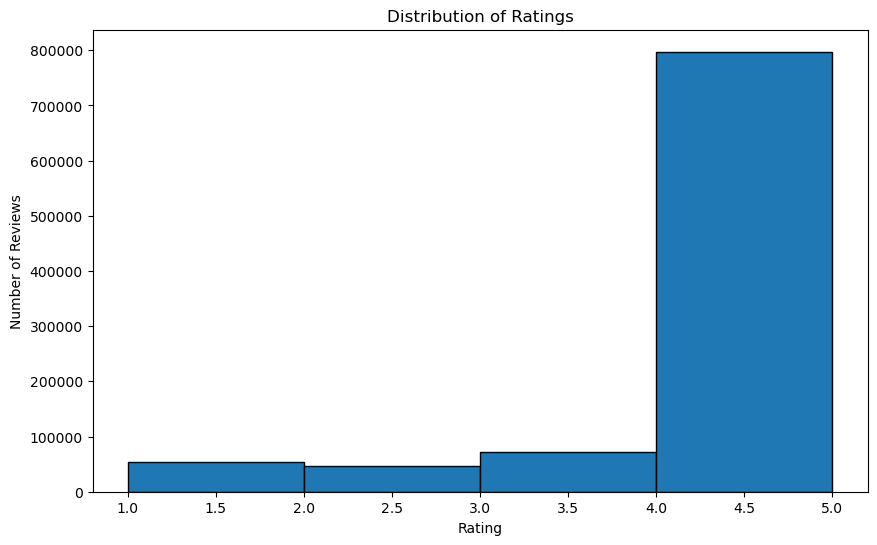

Summary Statistics for Ratings:
count    969419.000000
mean          4.302369
std           1.146109
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [151]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['rating'], bins=range(1, 6), edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate summary statistics for ratings
rating_summary = df_cleaned['rating'].describe()
print(f"Summary Statistics for Ratings:\n{rating_summary}")


# Transform Ratings into Binary Sentiment
## Overview
To simplify the analysis and focus on identifying significant negative feedback, we can transform the continuous ratings into a binary sentiment label (e.g., positive or negative). This transformation will help in training a binary classification model.

## Actions
- Convert ratings into a binary sentiment label.
  - Ratings 4 and 5 can be labeled as 'positive'.
  - Ratings 1, 2, and 3 can be labeled as 'negative'.
- Verify the new binary sentiment labels.


In [153]:
# Convert ratings into binary sentiment labels
df_cleaned['sentiment'] = df_cleaned['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Display the first few rows with the new sentiment labels
print(df_cleaned[['rating', 'sentiment']].head())

# Check the distribution of the new sentiment labels
print(df_cleaned['sentiment'].value_counts())


   rating sentiment
0       5  positive
1       1  negative
2       5  positive
3       5  positive
4       5  positive
sentiment
positive    797299
negative    172120
Name: count, dtype: int64


### Visualizing Sentiment Distribution

In this step, we create a pie chart to visualize the distribution of positive and negative sentiment labels in our dataset. This visualization provides a clear overview of the balance between the two sentiment classes, helping us identify any potential class imbalances that might affect our model's performance.

The pie chart is generated using the `matplotlib` library. We calculate the count of each sentiment label from our cleaned DataFrame, then plot these values with distinct colors and percentage labels for better interpretability.

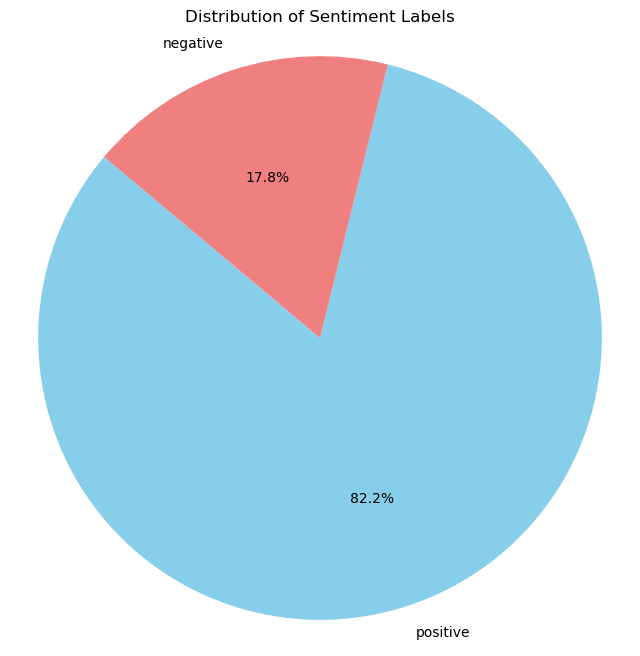

In [155]:
# Calculate sentiment distribution
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Define labels and sizes
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

### Sentiment Distribution Analysis

I generated a pie chart to visualize the sentiment distribution in the dataset. The chart shows that **17.9%** of the reviews are *negative* and **82.1%** are *positive*. This significant imbalance in sentiment distribution is an important consideration for the modeling process, as it could influence model performance. Future steps may involve addressing this imbalance through methods such as resampling or adjusting class weights.

In [157]:
# Split the dataset into training and testing sets
X = df_cleaned['review_text']
y = df_cleaned['sentiment']

# Using a test size of 20% and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression classifier on the training data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing set and evaluate the model
y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9176053722844587
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.68      0.75     34367
    positive       0.93      0.97      0.95    159517

    accuracy                           0.92    193884
   macro avg       0.88      0.83      0.85    193884
weighted avg       0.91      0.92      0.91    193884



### Data Preprocessing: Tokenization, Stopwords Removal, and Stemming

- **Tokenization:** 
  - The review text is tokenized using NLTK's `word_tokenize` to split the text into individual words.
  
- **Stopwords Removal:** 
  - Common English stopwords are removed using NLTK's stopword list to focus on informative words.
  
- **Punctuation and Numeric Removal:** 
  - Only alphabetic tokens are kept, filtering out punctuation and numbers.
  
- **Stemming:** 
  - The PorterStemmer is applied to reduce words to their root form, helping to normalize the text.
  
The processed review text is stored in the new column `processed_review` for subsequent analysis.

In [159]:
# Import necessary NLTK modules and download required datasets
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

[nltk_data] Downloading package punkt to /Users/junwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
# Ensure required NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define additional common words to remove
additional_stopwords = ['use', 'make', 'one', 'work', 'day', 'get', 'also']

# Combine NLTK stopwords with additional words
stop_words = set(stopwords.words('english')).union(additional_stopwords)

def preprocess_text(text):
    """
    Preprocess the input text by:
    - Converting to lowercase
    - Tokenizing using NLTK's word_tokenize
    - Removing punctuation and numeric tokens
    - Removing stopwords (both standard and additional)
    - Applying PorterStemmer for stemming
    Returns the processed text as a single string.
    """
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Filter out non-alphabetic tokens and remove stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    # Apply stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    # Join tokens back to string
    return " ".join(stemmed_tokens)

# Apply preprocessing to the review column and store in a new column 'processed_review'
df_cleaned['processed_review'] = df_cleaned['review_text'].astype(str).apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/junwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word Frequency Distribution

- **Objective:**  
  Identify the most frequently occurring words in the processed reviews to gain insights into common themes or terms used by customers.

- **Steps Performed:**
  1. Combined all processed reviews into a single string.
  2. Used `Counter` to count the frequency of each word.
  3. Printed the top 20 most common words.

This frequency distribution helps in understanding the dominant words in the dataset, which can influence feature engineering decisions. For instance, one may decide to remove overly common words that do not carry much meaning (e.g., domain-specific stopwords) or explore adding bigrams/trigrams for deeper context.

In [165]:
from collections import Counter

# Combine all processed reviews into one large string
all_words = " ".join(df_cleaned['processed_review']).split()

# Get the frequency distribution of all words
word_freq = Counter(all_words)

# Display the top 20 most common words
print("Top 20 Most Common Words:")
print(word_freq.most_common(20))

Top 20 Most Common Words:
[('skin', 1124023), ('product', 700713), ('use', 439504), ('love', 431849), ('feel', 415212), ('like', 345229), ('face', 298786), ('moistur', 296372), ('realli', 256578), ('dri', 244777), ('tri', 213819), ('look', 211365), ('great', 191505), ('smell', 182424), ('hydrat', 174482), ('eye', 168918), ('cream', 165971), ('would', 160914), ('get', 156357), ('also', 142184)]


### Feature Extraction with TF-IDF

- **Objective:**  
  Convert the preprocessed review text into numerical features using TF-IDF.

- **Process:**
  - **Data Splitting:**  
    - The dataset is divided into training (80%) and testing (20%) sets.
  - **TF-IDF Vectorization:**  
    - The `TfidfVectorizer` is configured to:
      - Limit the feature space to a maximum of 5000 features.
      - Capture both unigrams and bigrams (`ngram_range=(1,2)`).
  - **Result:**  
    - The review text is transformed into TF-IDF matrices for both training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and testing sets
X = df_cleaned['processed_review']  # Using the preprocessed review text
y = df_cleaned['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the TF-IDF Vectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
# Fit the vectorizer on the training data and transform both train and test sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the shapes of the resulting TF-IDF matrices
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

Training data shape: (775535, 5000)
Testing data shape: (193884, 5000)


### Resampling the Training Data with Oversampling

- **Objective:**  
  Address the class imbalance by oversampling the minority class (negative reviews) in the training data.

- **Process:**
  - **Oversampling:**  
    - The `RandomOverSampler` from the `imblearn` package is applied to the TF-IDF features (`X_train_tfidf`) and the corresponding labels (`y_train`).
  - **Result:**  
    - The oversampling creates a balanced training set, ensuring that both negative and positive classes are equally represented.
  - **Verification:**  
    - The new class distribution is printed to confirm that oversampling has balanced the training data.

This step ensures that the model training is based on a balanced dataset, which can help improve the performance on the minority class.

In [26]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Apply oversampling on the training TF-IDF vectors and labels
ros = RandomOverSampler(random_state=42)
X_train_tfidf_res, y_train_res = ros.fit_resample(X_train_tfidf, y_train)

# Display the new class distribution after oversampling
unique, counts = np.unique(y_train_res, return_counts=True)
print("Resampled training set class distribution:")
print(dict(zip(unique, counts)))

Resampled training set class distribution:
{'negative': 637782, 'positive': 637782}


### Model Training on Oversampled Data

- **Objective:**  
  Train and evaluate a Logistic Regression classifier using the balanced (oversampled) training data.

- **Process:**
  - **Training:**  
    - The Logistic Regression model is trained on the oversampled TF-IDF features (`X_train_tfidf_res`) with balanced class weights.
  - **Evaluation:**  
    - Predictions are made on the unchanged test set.
    - Model performance is evaluated using:
      - **Accuracy Score:** Overall correctness of the model.
      - **Classification Report:** Precision, recall, and F1-score for both classes.
      - **Confusion Matrix:** Visualization of misclassifications to identify improvement areas.
      
- **Outcome:**  
  - Training on balanced data is expected to improve the model’s ability to correctly classify the minority class (negative reviews) without significantly sacrificing overall accuracy.

Accuracy after oversampling: 0.8823317034928101
Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.88      0.73     34367
    positive       0.97      0.88      0.93    159517

    accuracy                           0.88    193884
   macro avg       0.79      0.88      0.83    193884
weighted avg       0.91      0.88      0.89    193884



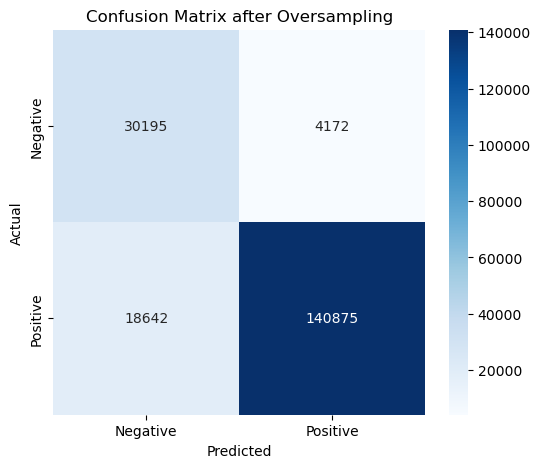

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Logistic Regression model on the oversampled training data
clf_res = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf_res.fit(X_train_tfidf_res, y_train_res)

# Predict on the test set (which remains unchanged)
y_pred_res = clf_res.predict(X_test_tfidf)

# Evaluate model performance on the test set
accuracy_res = accuracy_score(y_test, y_pred_res)
print("Accuracy after oversampling:", accuracy_res)
print("Classification Report:")
print(classification_report(y_test, y_pred_res))

# Plot the confusion matrix for the oversampled model
cm_res = confusion_matrix(y_test, y_pred_res)
plt.figure(figsize=(6,5))
sns.heatmap(cm_res, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix after Oversampling")
plt.show()

### Evaluation of Oversampling Results

The Logistic Regression model, trained on the oversampled dataset, achieved an **overall accuracy** of **0.8823**. Below is a closer look at the performance metrics for each sentiment class:

1. **Negative Class**  
   - **Precision: 0.62**  
     - Out of all predicted negative reviews, 62% were truly negative. This indicates that some positive reviews are still being labeled as negative.  
   - **Recall: 0.88**  
     - The model successfully identifies 88% of the actual negative reviews, reflecting an improvement in capturing the minority class.  
   - **F1-Score: 0.73**  
     - Balances precision and recall; the negative class F1-score has increased compared to non-oversampled training (if applicable).

2. **Positive Class**  
   - **Precision: 0.97**  
     - Very few negative reviews are being labeled as positive, showcasing strong performance for the majority class.  
   - **Recall: 0.88**  
     - The model correctly identifies 88% of positive reviews.  
   - **F1-Score: 0.93**  
     - Indicates a high level of consistency in predicting positive reviews.

3. **Confusion Matrix**  
   - Shows **30,195** true negatives, **4,172** false positives, **18,642** false negatives, and **140,875** true positives.  
   - The relatively high number of false negatives (18,642) suggests room for improvement in detecting positive reviews, but the negative recall remains solid.

4. **Key Observations**  
   - **Recall for the Negative Class (Minority) is High:** Oversampling has helped the model capture most negative reviews.  
   - **Precision for the Negative Class is Lower:** Some positive reviews are still being misclassified as negative.  
   - **Positive Class Metrics Remain Strong:** Precision is particularly high (0.97).

5. **Conclusion and Next Steps**  
   - Oversampling maintains good coverage of negative reviews without drastically reducing overall accuracy.  
   - To further improve negative precision, consider additional strategies such as:
     - **Hyperparameter Tuning** (e.g., adjusting regularization strength `C` in Logistic Regression).  
     - **Advanced Feature Engineering** (e.g., incorporating bigrams/trigrams, domain-specific stopwords).  
     - **Alternative Models** (e.g., SVM, Random Forest, or Naive Bayes) for better balance between precision and recall.

### Model Comparison Using an Optimized Pipeline

**Objectives:**  
- Compare multiple classification models on the full dataset using oversampling and TF-IDF vectorization.  
- Evaluate each model using efficient cross-validation to determine which one achieves the best average accuracy on the oversampled data.

**Optimizations Implemented:**  
- **Reduced Feature Space:**  
  - TF-IDF vectorization is configured with `max_features=2000` and `ngram_range=(1,1)` (unigrams only) to streamline the feature set.  
- **Integrated Oversampling:**  
  - `RandomOverSampler` is used within the pipeline to balance the class distribution during training.  
- **Efficient Evaluation:**  
  - 2-fold cross-validation (`cv=2`) with parallel processing (`n_jobs=2`) is employed to speed up model evaluation.

**Models Compared:**  
- Logistic Regression  
- Naive Bayes  
- Linear SVM  
- Random Forest

**Outcome:**  
- The code computes the average accuracy for each model using cross-validation on the oversampled data.  
- The best model is identified based on the highest average accuracy, and its performance is printed.

### Why Oversampling is Applied Again in the Model Comparison Pipeline

- **Consistency Across Models:**  
  Embedding oversampling in the pipeline ensures that every model is trained on balanced data, making the comparison fair and consistent.

- **Integration with Cross-Validation:**  
  Oversampling is applied within each training fold during cross-validation. This means every fold is balanced, which is crucial for obtaining reliable performance metrics.

- **Self-Contained Process:**  
  Including oversampling in the pipeline makes the entire evaluation process reproducible and independent. Even if oversampling was done earlier for the final model training, repeating it here ensures all models are evaluated under the same conditions.

- **Fair Comparison:**  
  By integrating oversampling into the model comparison pipeline, any improvements or differences in model performance are attributable to the models themselves, not to variations in class balance.

In [38]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Using the full dataset (df_cleaned)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

results = {}

# Compare each model using an imblearn pipeline that includes TF-IDF vectorization and oversampling
for name, model in models.items():
    pipeline = imbpipeline([
        ("vectorizer", TfidfVectorizer(max_features=2000, ngram_range=(1,1))),
        ("oversampler", RandomOverSampler(random_state=42)),
        ("classifier", model)
    ])
    
    # Use 2-fold cross-validation with n_jobs=2 for efficiency
    scores = cross_val_score(pipeline, df_cleaned['processed_review'], df_cleaned['sentiment'], 
                             cv=2, scoring='accuracy', n_jobs=2)
    results[name] = scores.mean()
    print(f"{name}: {results[name]:.4f}")

# Identify and print the best model based on average accuracy
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Logistic Regression: 0.8588
Naive Bayes: 0.8316
Linear SVM: 0.8583
Random Forest: 0.8938

Best Model: Random Forest with Accuracy: 0.8938


### Optimized Pipeline Training Documentation

#### Overview
This optimized pipeline setup is designed to speed up the training process while maintaining robust model performance. The optimizations include:

- **Caching Intermediate Steps:**  
  Using the `memory` parameter in the pipeline to cache expensive transformations (e.g., TF-IDF vectorization) avoids recomputation during repeated training or cross-validation.

- **Reducing Feature Space:**  
  Lowering `max_features` in the `TfidfVectorizer` (from 2000 to 1500) reduces the dimensionality of the input features, leading to faster vectorization and model training.

- **Parallel Processing:**  
  Setting `n_jobs=-1` in the `RandomForestClassifier` leverages all available CPU cores to accelerate training.

- **Logging and Timing:**  
  Logging statements and timing measurements provide real-time feedback on each step of the process, making it easier to monitor and troubleshoot training performance.

#### Detailed Steps

1. **Cache Setup:**  
   - A temporary directory is created using `mkdtemp()` to store cached results.
   - The pipeline is configured with `memory=cachedir`, which caches the output of the `TfidfVectorizer` and any other expensive steps.

2. **Pipeline Configuration:**  
   - **TF-IDF Vectorizer:**  
     Configured with `max_features=1500` and `ngram_range=(1,1)` to reduce feature space.
   - **Oversampling:**  
     The `RandomOverSampler` balances class distribution.
   - **Classifier:**  
     The `RandomForestClassifier` is set with 100 trees, balanced class weights, and `n_jobs=-1` to use all CPU cores.

3. **Training & Logging:**  
   - The pipeline's training is timed using Python’s `time` module.
   - Logging messages indicate the start and completion of training, as well as any critical information such as the cache directory location.
   - The trained pipeline is verified by checking the classifier's attributes (e.g., `classes_`).

4. **Prediction:**  
   - Once the pipeline is trained, it can predict the sentiment of new reviews.
   - Logging messages are used to confirm the prediction process and display the predicted sentiments.

#### Business Value
- **Faster Iterations:**  
  Speeding up the training process allows for more rapid experimentation and model refinement.
- **Robust Model Deployment:**  
  The consistent and efficient pipeline ensures that new customer reviews are processed and predicted reliably, providing actionable insights to improve online sales.
- **Resource Efficiency:**  
  Optimized resource usage (memory and CPU) minimizes operational costs while maintaining high performance.

This documentation serves as a guide to understand the modifications made to optimize the training pipeline and explains the rationale behind each optimization step.

In [96]:
import logging
import time
from tempfile import mkdtemp
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Set up a temporary directory for caching intermediate results
cachedir = mkdtemp()
logger.info(f"Using cache directory: {cachedir}")

# Create the training pipeline with caching and parallel processing
logger.info("Creating the training pipeline with caching and parallel processing...")
pipeline_rf = imbpipeline([
    ("vectorizer", TfidfVectorizer(max_features=1500, ngram_range=(1,1))),  # Reduced max_features for speed
    ("oversampler", RandomOverSampler(random_state=42)),
    ("classifier", RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1))
], memory=cachedir)

# Measure training time
logger.info("Starting pipeline training...")
start_time = time.time()
pipeline_rf.fit(df_cleaned['processed_review'], df_cleaned['sentiment'])
elapsed_time = time.time() - start_time
logger.info(f"Training completed in {elapsed_time:.2f} seconds.")

# Save the trained pipeline to disk using joblib
model_filename = 'trained_pipeline_rf.joblib'
dump(pipeline_rf, model_filename)
logger.info(f"Trained pipeline saved to '{model_filename}'.")

# To load the model in the future, you can use:
# pipeline_rf = load('trained_pipeline_rf.joblib')

2025-02-26 16:39:27,378 - INFO - Using cache directory: /var/folders/12/lt3qtgvx0ql_f109fcdcp_480000gn/T/tmpvt_uni5z
2025-02-26 16:39:27,379 - INFO - Creating the training pipeline with caching and parallel processing...
2025-02-26 16:39:27,533 - INFO - Starting pipeline training...
2025-02-26 19:19:24,336 - INFO - Training completed in 9596.80 seconds.
2025-02-26 19:19:25,489 - INFO - Trained pipeline saved to 'trained_pipeline_rf.joblib'.


### Testing Multiple New Reviews Using the Persisted Pipeline

- **Objective:**  
  Evaluate the performance of the persisted pipeline by predicting sentiment for a set of new reviews, including two with a clearly positive tone and two with a clearly negative tone.

- **Process:**
  1. **Load the Pipeline:**  
     - The trained pipeline is loaded from disk using joblib's `load()` function.
  2. **Define New Reviews:**  
     - Four sample reviews are defined: two expected to be positive and two expected to be negative.
  3. **Prediction:**  
     - The loaded pipeline processes the new reviews (applying all necessary preprocessing and vectorization) and outputs predicted sentiments.
  4. **Output:**  
     - Each review along with its predicted sentiment is printed.

- **Business Value:**  
  - Demonstrates the model's capability to quickly and reliably classify new customer feedback.
  - Provides actionable insights into customer sentiment that can guide marketing strategies and product improvements to enhance online sales.

In [102]:
from joblib import load

# Load the trained pipeline from disk
pipeline_rf = load('trained_pipeline_rf.joblib')
print("Trained pipeline loaded successfully.")

# Define four new review samples: 2 positive and 2 negative
new_reviews = [
    "I absolutely love this product! It has transformed my skin and left it glowing.",  # Positive
    "This is the best skincare product I've ever used! My skin feels amazing.",         # Positive
    "I hate this product. It ruined my skin and left it irritated.",                      # Negative
    "This product is awful. It made my skin break out and is completely ineffective."     # Negative
]

# Predict sentiment for the new reviews using the loaded pipeline
predicted_sentiments = pipeline_rf.predict(new_reviews)

# Print each review with its predicted sentiment
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Trained pipeline loaded successfully.
Review: I absolutely love this product! It has transformed my skin and left it glowing.
Predicted Sentiment: positive

Review: This is the best skincare product I've ever used! My skin feels amazing.
Predicted Sentiment: positive

Review: I hate this product. It ruined my skin and left it irritated.
Predicted Sentiment: negative

Review: This product is awful. It made my skin break out and is completely ineffective.
Predicted Sentiment: negative



### Summary of New Review Predictions

- **Positive Reviews:**  
  - "I absolutely love this product! It has transformed my skin and left it glowing." → **Predicted Sentiment: positive**  
  - "This is the best skincare product I've ever used! My skin feels amazing." → **Predicted Sentiment: positive**

- **Negative Reviews:**  
  - "I hate this product. It ruined my skin and left it irritated." → **Predicted Sentiment: negative**  
  - "This product is awful. It made my skin break out and is completely ineffective." → **Predicted Sentiment: negative**

### Business Implications

- **Customer Feedback Analysis:**  
  The model accurately distinguishes between clearly positive and negative reviews. This can help Sephora:
  - **Leverage Positive Feedback:** Use positive sentiments in marketing campaigns to highlight popular products.
  - **Identify Areas for Improvement:** Investigate the root causes behind negative reviews to enhance product quality and customer satisfaction.

- **Actionable Insights:**  
  With reliable sentiment predictions, decision-makers can prioritize product enhancements, refine promotional strategies, and address customer concerns more effectively.

Overall, the successful predictions demonstrate the model's readiness for real-world applications, delivering valuable insights to support Sephora's business goal of improving online channel sales.

### Dashboard: Word Cloud for Positive Reviews

- **Purpose:**  
  Visualize the most frequently occurring words in positive reviews to understand what customers appreciate about the products.

- **Process:**  
  1. **Text Aggregation:**  
     - All reviews predicted as positive are concatenated into a single text string.
  2. **Word Cloud Generation:**  
     - The `WordCloud` library generates a visual representation, where word size indicates frequency.
  3. **Visualization:**  
     - The word cloud is displayed with no axis and a clear title.

- **Business Insight:**  
  - This visualization helps highlight key positive attributes mentioned by customers, which can be leveraged in marketing and product promotion to boost online sales.

2025-02-27 09:22:04,087 - INFO - Trained pipeline loaded successfully from disk.
2025-02-27 09:22:04,134 - INFO - Sample predictions generated successfully.
2025-02-27 09:22:15,978 - INFO - Full dataset predictions generated successfully.


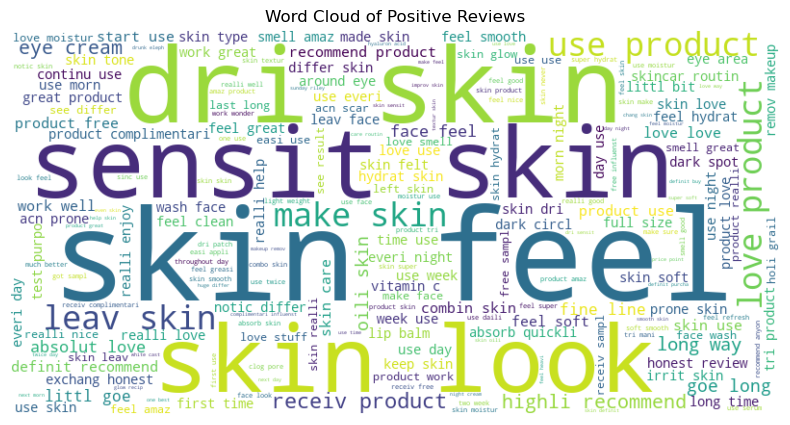

In [120]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import logging
from joblib import load

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load the persisted pipeline (if not already loaded)
try:
    best_pipeline_no_tuning = load('trained_pipeline_rf.joblib')
    logger.info("Trained pipeline loaded successfully from disk.")
except Exception as e:
    logger.error(f"Error loading the pipeline: {e}")
    raise

# Use a small sample from the full dataset to test predictions first.
try:
    sample_reviews = df_cleaned['processed_review'].head(100)  # First 100 reviews as a sample
    sample_predictions = best_pipeline_no_tuning.predict(sample_reviews)
    # Store predictions for the sample
    df_cleaned.loc[sample_reviews.index, 'predicted_sentiment'] = sample_predictions
    logger.info("Sample predictions generated successfully.")
    
    # Now, generate predictions for the full dataset
    full_predictions = best_pipeline_no_tuning.predict(df_cleaned['processed_review'])
    df_cleaned['predicted_sentiment'] = full_predictions
    logger.info("Full dataset predictions generated successfully.")
except Exception as e:
    logger.error(f"Error generating predictions using the loaded pipeline: {e}")
    raise

# Generate text from all positive reviews based on predicted sentiment
try:
    positive_text = " ".join(df_cleaned.loc[df_cleaned['predicted_sentiment'] == 'positive', 'processed_review'])
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    
    # Plot the word cloud for positive reviews
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Positive Reviews")
    plt.show()
except Exception as e:
    logger.error(f"Error generating the word cloud for positive reviews: {e}")

### Word Cloud of Positive Reviews: Observations and Next Steps

**Observations:**
- Common words include **“skin,” “feel,” “look,” “sensitive,” “dry,” “product”**—suggesting that many positive reviews focus on how the product impacts the user’s skin (e.g., making it feel better or look healthier).
- Words like **“leav,” “hydr,” “love”** also appear prominently, indicating satisfaction with moisturizing or hydrating effects.
- The emphasis on **“sensitive”** suggests that products which cater to sensitive skin may be particularly well-received.

**Potential Business Insights:**
1. **Highlight Product Benefits:**  
   - Marketing materials can emphasize the product’s ability to improve skin feel and appearance.
   - Specifically, mention benefits for those with **sensitive** or **dry** skin.

2. **Leverage Customer Language:**  
   - Use phrases customers commonly mention (e.g., “feel skin,” “make skin,” “look skin”) in campaigns to align marketing with customer perceptions.

3. **Address Negative Aspects:**  
   - If some words (e.g., “dry”) appear in a neutral or potentially negative context, investigate whether the product is meeting hydration expectations or if there’s confusion about product usage.

4. **Product Development Opportunities:**  
   - Consider developing or promoting lines specifically targeting **sensitive** or **dry** skin, as these are frequent themes in positive reviews.

**Next Steps:**
- Create a similar word cloud for **negative reviews** to compare and understand the pain points.
- Integrate additional visualizations (e.g., **bar charts** for the most common words, **time-series** plots if timestamps are available) to provide more nuanced insights.
- Use these findings to guide **marketing strategies**, **product enhancements**, and **customer support** initiatives, ultimately aiming to boost Sephora’s online sales.

This visualization of positive reviews helps Sephora understand the core attributes that customers value, informing data-driven decisions to enhance the customer experience and increase online channel sales.

### Dashboard: Word Cloud for Negative Reviews

- **Objective:**  
  Identify common words and themes in reviews predicted as negative, highlighting pain points and dissatisfaction areas.

- **Steps:**
  1. **Prediction Check:**  
     - If the `predicted_sentiment` column does not exist, generate predictions for a small sample and then for the full dataset.
  2. **Negative Text Aggregation:**  
     - Concatenate all reviews predicted as negative into a single string.
  3. **Word Cloud Generation:**  
     - Use the `WordCloud` library to visualize the frequency of words in negative reviews.
  4. **Visualization:**  
     - Display the word cloud without axis labels for clarity, and provide a descriptive title.

- **Business Value:**  
  - Understanding the language used in negative reviews helps Sephora pinpoint customer pain points, enabling targeted improvements to products, marketing strategies, and customer service efforts. 
  - Addressing these concerns can boost customer satisfaction and ultimately increase online sales.

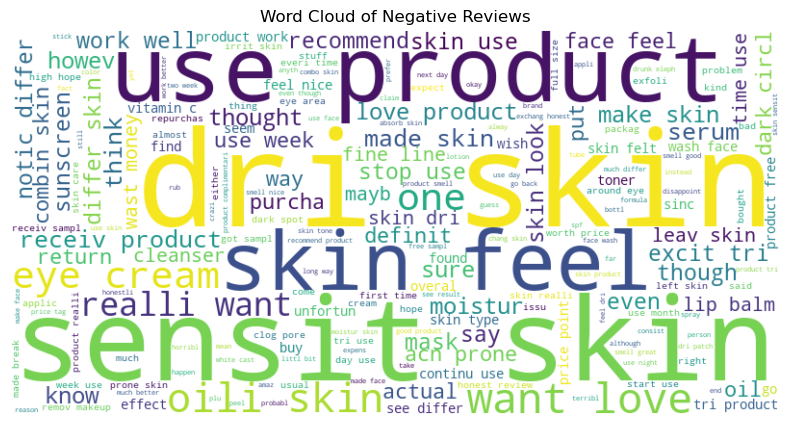

In [124]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import logging

# Configure logging for this cell
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Ensure that 'predicted_sentiment' is already in the DataFrame.
# If it's not, generate it using the loaded pipeline on a small sample, then on the full dataset.
if 'predicted_sentiment' not in df_cleaned.columns:
    logger.info("Column 'predicted_sentiment' not found. Generating predictions on a small sample to verify pipeline...")
    try:
        sample_reviews = df_cleaned['processed_review'].head(100)
        sample_predictions = best_pipeline_no_tuning.predict(sample_reviews)
        df_cleaned.loc[sample_reviews.index, 'predicted_sentiment'] = sample_predictions
        logger.info("Sample predictions generated successfully.")
        
        full_predictions = best_pipeline_no_tuning.predict(df_cleaned['processed_review'])
        df_cleaned['predicted_sentiment'] = full_predictions
        logger.info("Full dataset predictions generated successfully.")
    except Exception as e:
        logger.error(f"Error generating predictions: {e}")
        raise

# Generate text from all negative reviews based on predicted sentiment
try:
    negative_text = " ".join(df_cleaned.loc[df_cleaned['predicted_sentiment'] == 'negative', 'processed_review'])
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    
    # Plot the word cloud for negative reviews
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Negative Reviews")
    plt.show()
except Exception as e:
    logger.error(f"Error generating the word cloud for negative reviews: {e}")

### Word Cloud of Negative Reviews: Observations and Recommendations

**Observations:**
- Words like **"skin," "dry," "sensit," "feel,"** and **"use product"** dominate, suggesting that many negative reviews still center around how the product impacts users’ skin.
- **"Realli," "want," "might"** appear as context words, which could indicate uncertainty or unmet expectations.

**Possible Reasons for Negative Sentiment:**
1. **Dry or Sensitive Skin Issues:**
   - Customers may feel the product is not sufficiently moisturizing or may be causing irritation on sensitive skin.
2. **Usage Confusion:**
   - Frequent references to “use product” might imply some confusion around how to apply the product effectively, leading to dissatisfaction.

**Business Implications:**
1. **Product Improvement:**
   - Investigate product formulas or instructions for use to ensure they address dryness or sensitivity adequately.
2. **Clearer Usage Guidelines:**
   - Enhance product labels, FAQs, and support materials to reduce confusion and improve results for customers.
3. **Targeted Support and Education:**
   - Provide more detailed guidance or tutorials on using the product to manage dryness or sensitivity issues.

**Next Steps:**
- **Compare Positive and Negative Clouds:**
  - Identify overlapping themes (e.g., "skin," "use product") and examine what differentiates positive experiences from negative ones.
- **Time-Series or Segment Analysis:**
  - If timestamps or product categories are available, segment negative reviews by date or product line to spot trends or isolated quality issues.
- **Actionable Follow-Up:**
  - Address the most common complaints through product modifications, clearer instructions, or targeted customer support to reduce negative sentiment and boost online sales.

### Dashboard: Top Words Bar Chart for Both Positive and Negative Reviews

- **Objective:**  
  Provide two separate bar charts showing the top words in positive reviews and the top words in negative reviews, respectively.

- **Steps:**
  1. **Define a Function (`plot_top_words`):**  
     - Takes a `sentiment_label` ("positive" or "negative") and the number of words to display (`num_words`).
     - Filters reviews based on the chosen sentiment, counts word frequency, and plots the top words in a horizontal bar chart.
  2. **Positive Reviews Chart:**  
     - Calls `plot_top_words('positive')` to display the top 20 words in positive reviews.
  3. **Negative Reviews Chart:**  
     - Calls `plot_top_words('negative')` to display the top 20 words in negative reviews.

- **Business Value:**  
  - Directly compares the most frequently used words in both positive and negative reviews, revealing key themes and pain points.
  - Aids decision-makers in addressing negative feedback and amplifying positive product attributes, ultimately driving better customer satisfaction and higher online sales.

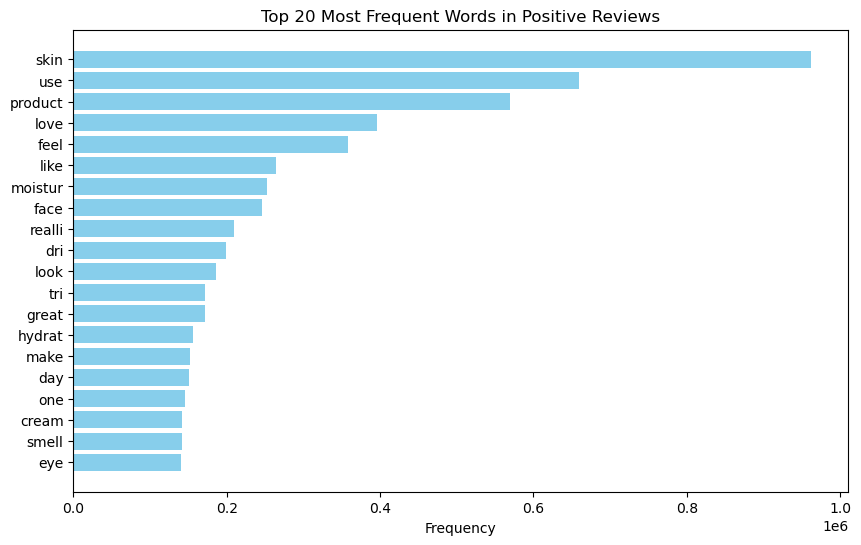

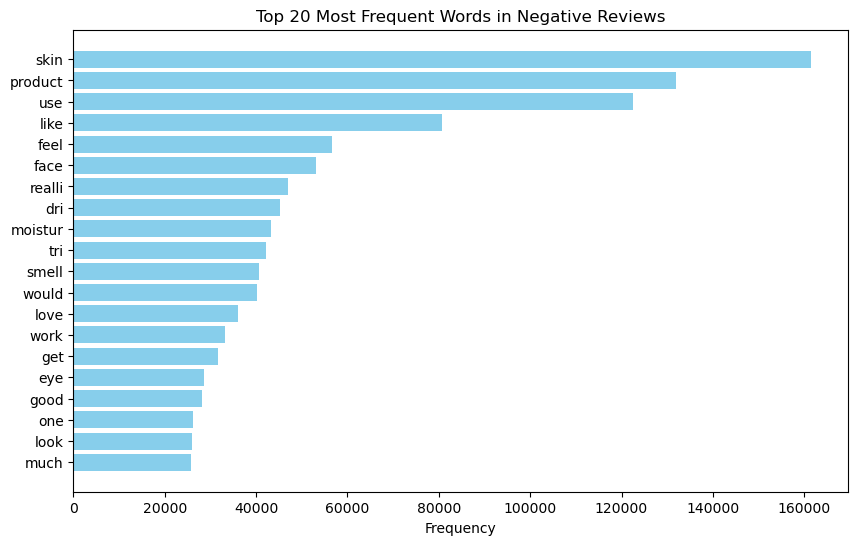

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def plot_top_words(sentiment_label, num_words=20):
    """
    Creates a horizontal bar chart of the top 'num_words' for the specified sentiment_label.
    """
    try:
        # Filter reviews based on the chosen sentiment
        filtered_reviews = df_cleaned.loc[df_cleaned['predicted_sentiment'] == sentiment_label, 'processed_review']
        
        # Split into individual words
        words = " ".join(filtered_reviews).split()
        
        # Count the frequency of each word
        word_counts = Counter(words)
        
        # Select the top 'num_words' most common words
        top_words = word_counts.most_common(num_words)
        
        # Convert to DataFrame for plotting
        df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])
        
        # Create a bar chart
        plt.figure(figsize=(10, 6))
        plt.barh(df_top_words['word'], df_top_words['count'], color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis so the top word appears at the top
        plt.xlabel('Frequency')
        plt.title(f"Top {num_words} Most Frequent Words in {sentiment_label.capitalize()} Reviews")
        plt.show()
        
    except Exception as e:
        logger.error(f"Error generating top words bar chart for {sentiment_label} reviews: {e}")

# Generate bar chart for positive reviews
plot_top_words('positive', num_words=20)

# Generate bar chart for negative reviews
plot_top_words('negative', num_words=20)

### Analysis of Top Words in Positive vs. Negative Reviews

**1. Common Themes Across Both Sentiments**  
- **"skin"** is the most frequently mentioned word in both positive and negative reviews, indicating that nearly all feedback (good or bad) revolves around the product’s impact on skin health or appearance.  
- **"use," "product," "feel," "like,"** and **"face"** also appear in both lists, suggesting that customers across the sentiment spectrum focus on product application, texture, and results.

**2. Differences in Word Frequency and Context**  
- **Positive Reviews:**  
  - Words like **"love," "great," "hydr," "moistur,"** and **"cream"** are more prominent, highlighting satisfaction with the product’s moisturizing and overall effectiveness.  
  - **"feel"** and **"like"** in a positive context likely reflect enjoyment or comfort in using the product.  
- **Negative Reviews:**  
  - **"product"** ranks higher than in positive reviews, often signifying direct dissatisfaction (e.g., “this product didn’t work”).  
  - Words like **"smell," "work," "get,"** and **"much"** appear, suggesting concerns about fragrance, effectiveness, or perceived value.  
  - **"dri"** (dry) is mentioned in both sentiments, but likely indicates a failure to hydrate in negative reviews versus successful hydration in positive ones.

**3. Potential Business Insights**  
- **Moisturizing vs. Dryness:**  
  - The recurring theme of dryness vs. hydration suggests that effectively addressing dryness or sensitivity is a crucial factor in customer satisfaction.  
  - Ensuring products deliver on moisturizing promises (and clarifying usage instructions) can reduce negative feedback.
- **Fragrance & Texture Concerns:**  
  - The prominence of **"smell"** in negative reviews indicates that fragrance (or odor) might be a frequent point of dissatisfaction.
- **Education & Usage Instructions:**  
  - Frequent references to **"use"** and **"product"** in negative reviews hint that customers may not be using the product correctly or have unmet expectations. Enhanced instructions, tutorials, or usage tips could help reduce negative experiences.

**4. Recommendations**  
1. **Focus on Dry/Sensitive Skin Solutions:**  
   - Given the emphasis on “dry” and “sensit,” expand product lines or provide clearer usage guidance for these concerns.
2. **Refine Product Messaging:**  
   - Highlight the benefits customers love in positive reviews (e.g., hydration, great feel) to attract new buyers.  
   - Provide disclaimers or instructions to manage expectations regarding fragrance or texture, especially if these elements are known to cause negative reactions.
3. **Enhance Customer Support & Education:**  
   - Offer more detailed guides or Q&A resources addressing common usage pitfalls, especially around dryness, sensitivity, and application techniques.
4. **Iterate & Monitor:**  
   - Regularly re-run this analysis on new reviews to track whether improvements (e.g., formula tweaks or better instructions) reduce negative feedback and bolster positive sentiment over time.

By examining the most frequent words in positive and negative reviews side by side, **Sephora** can pinpoint where products are excelling (hydration, feel) and where issues lie (dryness, fragrance, effectiveness), ultimately guiding data-driven decisions to improve online sales and customer satisfaction.

### Final Step: Consolidated Business Insights & Recommendations

After creating visualizations (pie charts, word clouds, bar charts) and analyzing positive vs. negative reviews, this final step translates your findings into clear, actionable insights for Sephora’s leadership. 

1. **Overall Sentiment Snapshot**  
   - A large proportion of reviews are positive, emphasizing benefits like hydration and improved skin feel.
   - Negative reviews often highlight dryness, sensitivity, or confusion about product usage.

2. **Key Positive Themes**  
   - **Moisturizing Benefits:** Words like “love,” “hydr,” “moistur” indicate strong approval of hydrating properties.  
   - **Skin Improvement:** Terms like “feel,” “look,” “great” underscore how customers appreciate visible improvements in their skin.

3. **Common Negative Pain Points**  
   - **Dry/Sensitive Skin:** Negative reviews frequently mention dryness or irritation, suggesting some customers experience adverse effects.  
   - **Fragrance Issues:** The word “smell” appears prominently, indicating dissatisfaction with scent for certain customers.  
   - **Usage Confusion:** References to “use product” in negative contexts may mean customers need more guidance.

4. **Actionable Recommendations**  
   - **Enhance Product Labeling & Usage Instructions:**  
     Provide clearer, more detailed instructions to mitigate dryness or irritation.  
   - **Focus on Sensitive Skin Solutions:**  
     Develop or promote specialized formulas for those with sensitive or dry skin.  
   - **Offer Fragrance-Free Options:**  
     Address common complaints about scent by offering milder or fragrance-free alternatives.  
   - **Continual Monitoring & Iteration:**  
     Re-run these analyses periodically to measure how product improvements and better instructions affect sentiment over time.

5. **Business Value**  
   - **Improved Customer Satisfaction:**  
     Addressing the issues highlighted in negative reviews can convert dissatisfied customers into repeat buyers.  
   - **Strategic Marketing & Product Development:**  
     Positive themes can be amplified in marketing, while negative themes guide product enhancements.  
   - **Increased Online Sales:**  
     By focusing on high-impact improvements (like dryness and fragrance concerns), Sephora can attract new customers and retain existing ones, driving revenue growth.

These consolidated insights serve as the final piece of your dashboard, ensuring that data-driven findings are communicated effectively to stakeholders and translated into meaningful business actions.